In [1]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Data mining

In [4]:
data= pd.read_csv('/content/drive/MyDrive/Specialisation_ressource/Cours3/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
data.dtypes.value_counts()

object    23
Name: count, dtype: int64

In [10]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [11]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
data.duplicated().sum()

0

# Data inspection

In [13]:
data.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [14]:
data.iloc[:,0].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [16]:
data.iloc[:,0].value_counts(normalize=True).round(2)

class
e    0.52
p    0.48
Name: proportion, dtype: float64

<Axes: ylabel='count'>

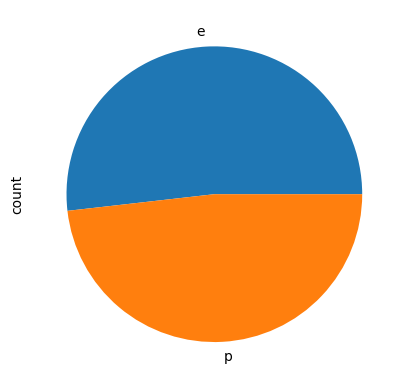

In [18]:
data.iloc[:,0].value_counts().plot(kind='pie')

# Cleaning

## Label encoding

In [21]:
labelencoder=LabelEncoder()
for col in data.columns:
  data[col]=labelencoder.fit_transform(data[col])

In [22]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [25]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [26]:
data= data.rename(columns={'class':'target'})
data.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [27]:
# On supprime la colonne qui a une seule valeur unique

data=data.drop('veil-type',axis=1)
data.nunique()

target                       2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

# Exporter le ficher dataCleaned.csv

In [28]:
path='/content/drive/MyDrive/Specialisation_ressource/Cours3/dataCleaned.csv'
data.to_csv(path,index=False)

# La modelisation

In [30]:
data=pd.read_csv('/content/drive/MyDrive/Specialisation_ressource/Cours3/dataCleaned.csv')

data.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# Data preparation

In [32]:
X= data.drop('target',axis=1)
y=data['target']

In [33]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [34]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                                y,
                                               test_size=0.3,
                                               random_state=42)

In [38]:
print("La taille des donnes d'entrainement",X_train.shape," et y d'entrainement: ",y_train.shape)
print("La taille des donnes de test",X_test.shape," et y de test: ",y_test.shape)

La taille des donnes d'entrainement (5686, 21)  et y d'entrainement:  (5686,)
La taille des donnes de test (2438, 21)  et y de test:  (2438,)


# Modelisation

### DummyClassifer: Classification naive

In [39]:
estimator=DummyClassifier(strategy='most_frequent')
estimator.fit(X_train,y_train)
y_pred=estimator.predict(X_test)

In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
pd.Series(y_pred).value_counts()

0    2438
Name: count, dtype: int64

In [42]:
tr_score=estimator.score(X_train,y_train)
te_score= estimator.score(X_test,y_test)
print("Le score de train est: ",tr_score)
print("Le score de test est: ",te_score)

Le score de train est:  0.5189940204009849
Le score de test est:  0.5155865463494668


## la fonction score

In [46]:
def score(estimator):
  """Fonction qui calcule le score de train et de test
  Car on va bc calculer les score dans notre TP"""
  tr=estimator.score(X_train,y_train)
  te=estimator.score(X_test,y_test)
  print(f"Le score de train est: {tr}.Et le score du test est: {te}")


In [44]:
score(estimator)

Le score de train est: 0.5189940204009849.Et le score du test est: 0.5155865463494668


In [54]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[1257,    0],
       [1181,    0]])

In [55]:
mat = pd.DataFrame(mat)
mat

,0,1
0,1257,0
1,1181,0


In [56]:
mat= pd.DataFrame(mat)
mat.index=[f"test_{i}" for i in mat.index]
mat.columns=[[f"pred_{i}" for i in mat.columns]]
mat

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [58]:
def confusion(x_test,y_pred):
  """Fonction qui calcule la matrice de confusion"""
  mat=confusion_matrix(y_test,y_pred)
  mat = pd.DataFrame(mat)
  mat.index=[f"test_{i}" for i in mat.index]
  mat.columns=[[f"pred_{i}" for i in mat.columns]]
  return mat


In [59]:
mat= confusion(X_test,y_pred)
mat

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [60]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

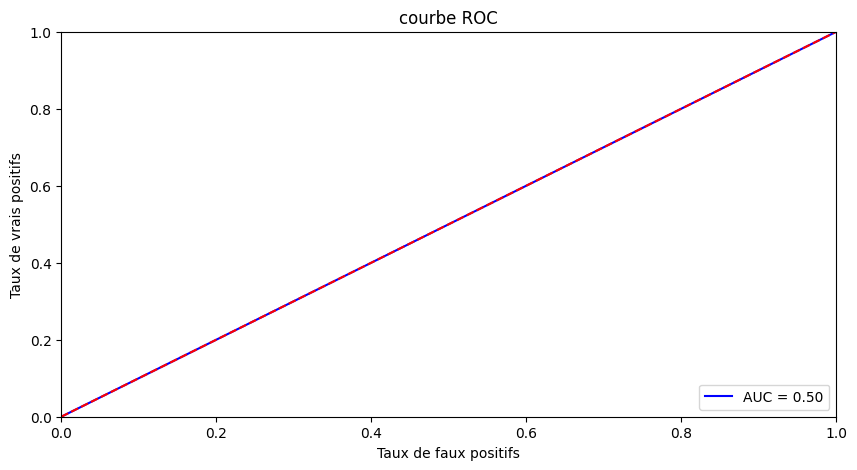

In [61]:
plt.figure(figsize=(10,5))
plt.title('courbe ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.show()

## Regression logistique et svm

In [69]:
estimator=LogisticRegression(solver='liblinear')
estimator.fit(X_train,y_train)
y_pred=estimator.predict(X_test)

In [70]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [68]:
predic_proba=estimator.predict_proba(X_test).round(2)
predic_proba

array([[1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [71]:
score(estimator)
confusion(y_test,y_pred)

Le score de train est: 0.9484699261343651.Et le score du test est: 0.9491386382280558


,pred_0,pred_1
test_0,1201,56
test_1,68,1113


In [72]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
roc_auc

0.95

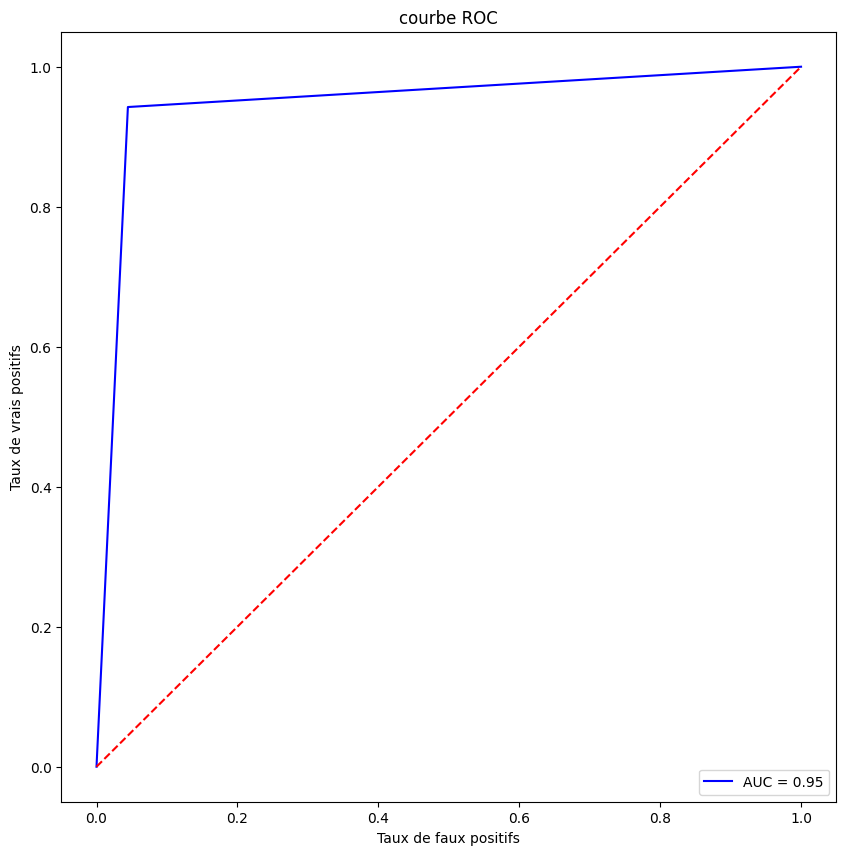

In [73]:
plt.figure(figsize=(10,10))
plt.title('courbe ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.axis('tight')
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.show()


In [74]:
estimator=LinearSVC()
estimator.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [76]:
y_pred=estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [79]:
score(estimator)
confusion(y_test,y_pred)

Le score de train est: 0.9461836088638762.Et le score du test est: 0.9450369155045119


,pred_0,pred_1
test_0,1200,57
test_1,77,1104


In [78]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
roc_auc

0.94

# Optimisation des models

In [81]:
estimatorLR=LogisticRegression()
params={
    'C':np.logspace(-3,3,7),
    'penalty':['l1','l2'],
    'solver':['liblinear','newton-cg','lbfgs']
}



In [82]:
grid=GridSearchCV(estimatorLR,
                  params,
                  cv=10,
                  n_jobs=-1,
                  return_train_score=True,
                  verbose=1,
                  scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [83]:
best_params=grid.best_params_
best_params

{'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [84]:
res= grid.cv_results_
res

{'mean_fit_time': array([3.16033363e-02, 2.79545784e-03, 3.46379280e-03, 4.54328299e-02,
        1.25833464e-01, 7.85906792e-02, 1.20464277e-01, 2.05526352e-03,
        1.97329521e-03, 3.59894514e-02, 9.25879240e-02, 8.26164007e-02,
        2.78640771e-01, 2.59833336e-03, 4.36182022e-03, 9.01445389e-02,
        1.87425971e-01, 1.86844349e-01, 6.01774516e+00, 1.79450512e-03,
        1.94694996e-03, 7.02507973e-02, 1.52310562e-01, 8.99048328e-02,
        7.59888885e+00, 4.26132679e-03, 5.38523197e-03, 2.10945272e-01,
        4.57723498e-01, 8.74853611e-02, 7.96640108e+00, 1.96402073e-03,
        1.91373825e-03, 1.75221133e-01, 4.14070702e-01, 1.58455563e-01,
        8.76496129e+00, 1.90660954e-03, 1.85728073e-03, 1.95333886e-01,
        4.41703320e-01, 9.48358297e-02]),
 'std_fit_time': array([1.09815091e-02, 1.70215700e-03, 2.85360980e-03, 1.60918510e-02,
        3.26645765e-02, 2.21705471e-02, 4.38519500e-02, 1.01066032e-03,
        5.13216393e-04, 5.73121839e-03, 8.05900799e-03, 1.032

In [85]:
res= pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.031603,0.010982,0.004141,0.000242,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.755712,0.789104,...,0.772718,0.771546,0.769201,0.769982,0.772177,0.771981,0.769050,0.774521,0.771368,0.001781
1,0.002795,0.001702,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.003464,0.002854,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.045433,0.016092,0.005705,0.002288,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.861160,0.891037,...,0.871409,0.869846,0.869846,0.870823,0.867722,0.871630,0.870066,0.871434,0.870110,0.001349
4,0.125833,0.032665,0.008932,0.004948,0.001,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
5,0.078591,0.022171,0.007925,0.004834,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
6,0.120464,0.043852,0.004678,0.001852,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.905097,0.920914,...,0.903654,0.905609,0.907758,0.904241,0.906018,0.902892,0.904259,0.903869,0.904541,0.001632
7,0.002055,0.001011,0.000000,0.000000,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.001973,0.000513,0.000000,0.000000,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.035989,0.005731,0.004071,0.000390,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.901582,0.919156,...,0.911276,0.909322,0.913817,0.913035,0.909926,0.910707,0.910903,0.910707,0.911303,0.001546


In [86]:
cols=[i for i in res.columns if "split" not in i ]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'param_solver',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [87]:
res= res[cols]
res= res.sort_values('rank_test_score')
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
40,0.441703,0.047898,0.004377,0.000239,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,1,0.961993,0.003726
39,0.195334,0.027448,0.004346,0.000949,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960251,0.012445,2,0.961895,0.003646
36,8.764961,1.828064,0.003935,0.000219,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.960076,0.012440,3,0.961504,0.003584
30,7.966401,2.484681,0.005742,0.003158,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959900,0.012703,4,0.961094,0.003641
34,0.414071,0.071244,0.006583,0.003490,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,5,0.961289,0.003506


In [100]:
def resultat(grid):
  res= grid.cv_results_
  res= pd.DataFrame(res)
  cols=[i for i in res.columns if "split" not in i ]
  res= res[cols]
  res= res.sort_values('rank_test_score')
  return res

In [90]:
resultat(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
40,0.441703,0.047898,0.004377,0.000239,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,1,0.961993,0.003726
39,0.195334,0.027448,0.004346,0.000949,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960251,0.012445,2,0.961895,0.003646
36,8.764961,1.828064,0.003935,0.000219,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.960076,0.012440,3,0.961504,0.003584
30,7.966401,2.484681,0.005742,0.003158,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959900,0.012703,4,0.961094,0.003641
34,0.414071,0.071244,0.006583,0.003490,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,5,0.961289,0.003506


In [93]:
estimatorBest= LogisticRegression(C=100.0, penalty='l2', solver='newton-cg')
estimatorBest.fit(X_train,y_train)
y_pred= estimatorBest.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [92]:
# estimationBest= LogisticRegression(**best_params)
# estimationBest

LogisticRegression(C=1000.0, solver='newton-cg')

In [94]:
score(estimatorBest)
confusion(y_test,y_pred)

Le score de train est: 0.9607808652831517.Et le score du test est: 0.9614438063986874


,pred_0,pred_1
test_0,1209,48
test_1,46,1135


In [95]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
roc_auc

0.96

### tuning de la svm

In [96]:
estimatorSVM=LinearSVC()
params={
    'C':np.logspace(-3,3,7),
    'penalty':['l1','l2'],
    'loss':['hinge','squared_hinge']
}

In [97]:
grid= GridSearchCV(estimatorSVM,
                  params,
                  cv=10,
                  n_jobs=-1,
                  return_train_score=True,
                  verbose=1,
                  scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalt

GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [98]:
best_params= grid.best_params_
best_params

{'C': 1.0, 'loss': 'hinge', 'penalty': 'l2'}

In [101]:
resultat(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_penalty,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
13,0.617501,0.183525,0.004660,0.002077,1.0,hinge,l2,"{'C': 1.0, 'loss': 'hinge', 'penalty': 'l2'}",0.958671,0.006630,1,0.958807,0.003777
9,0.419030,0.068071,0.005136,0.003657,0.1,hinge,l2,"{'C': 0.1, 'loss': 'hinge', 'penalty': 'l2'}",0.950053,0.006908,2,0.950053,0.000768
15,0.658620,0.190378,0.003959,0.000209,1.0,squared_hinge,l2,"{'C': 1.0, 'loss': 'squared_hinge', 'penalty':...",0.949525,0.010556,3,0.949799,0.002368
11,0.771939,0.160628,0.007467,0.003766,0.1,squared_hinge,l2,"{'C': 0.1, 'loss': 'squared_hinge', 'penalty':...",0.945654,0.008276,4,0.947493,0.001389
17,0.604651,0.026929,0.004563,0.001497,10.0,hinge,l2,"{'C': 10.0, 'loss': 'hinge', 'penalty': 'l2'}",0.944949,0.011311,5,0.946145,0.013992


In [102]:
estimatorBestSVM= LinearSVC(**best_params)
estimatorBestSVM.fit(X_train,y_train)
y_pred= estimatorBestSVM.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 1, 1, ..., 1, 0, 0])

In [103]:
score(estimatorBestSVM)
confusion(y_test,y_pred)

Le score de train est: 0.9577910657755891.Et le score du test est: 0.9598031173092699


,pred_0,pred_1
test_0,1205,52
test_1,46,1135


In [104]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
roc_auc

0.96